## Project Title: Hospital Bed Occupancy Analysis

**Project Description:**
This project predicts hospital bed availability using machine learning. It involves data cleaning, exploratory analysis, and model building to identify key factors affecting bed occupancy.


*Key Steps:*
- Processed and cleaned the dataset for accurate analysis.
- Analyzed correlations and visualized key trends.
- Implemented Linear Regression, Decision Tree, and Random Forest models.
- Evaluated models using MAE, MSE, and R² Score.

*Technologies Used:*
- Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn)
- Machine Learning (Regression Models)

*Resume Addition:*
Hospital Bed Occupancy Analysis
- Built a machine learning model to predict hospital bed availability.
- Performed data cleaning, visualization, and correlation analysis.
- Implemented and evaluated regression models for prediction.

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import numpy as np 
import pandas as pd
import os

In [30]:
# load the Dataset
df = pd.read_csv(r"C:\Users\Hitler Mugunthan\Downloads\HRR Scorecard_ 20 _ 40 _ 60 - 20 Population.csv")
df

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,*Based on a 50% reduction in occupancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412","45,289",...,142%,109%,70,103%,71%,55%,45,66%,46%,35%
2,"Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042","109,598",...,236%,178%,165,176%,118%,89%,108,115%,77%,58%
3,"Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991","262,038",...,352%,259%,380,273%,176%,130%,248,178%,115%,85%
4,"Albany, GA",704,60,221,462,27.0,43,"157,143","30,466","31,429",...,219%,157%,47,174%,109%,78%,31,115%,72%,52%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Winston-Salem, NC","2,870",499,843,"1,857",40.0,269,"899,862","197,294","179,972",...,205%,111%,276,690%,103%,55%,180,450%,67%,36%
302,"Worcester, MA","1,525",169,425,975,43.0,106,"652,386","122,123","130,477",...,365%,229%,194,451%,183%,115%,126,293%,119%,75%
303,"Yakima, WA",369,58,200,285,33.0,45,"220,972","40,707","44,194",...,291%,226%,65,197%,144%,112%,43,130%,96%,74%
304,"York, PA",868,79,267,567,8.0,43,"343,334","73,773","68,667",...,488%,266%,105,1313%,244%,133%,68,850%,158%,86%


In [31]:
df_new = df.drop(index=0).reset_index(drop=True)
df_new

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Abilene, TX",980,127,565,772,68.0,98,"226,444","50,412","45,289",...,142%,109%,70,103%,71%,55%,45,66%,46%,35%
1,"Akron, OH","1,358",186,518,938,94.0,140,"547,990","111,042","109,598",...,236%,178%,165,176%,118%,89%,108,115%,77%,58%
2,"Alameda County, CA","2,695",293,665,"1,680",139.0,216,"1,310,189","214,991","262,038",...,352%,259%,380,273%,176%,130%,248,178%,115%,85%
3,"Albany, GA",704,60,221,462,27.0,43,"157,143","30,466","31,429",...,219%,157%,47,174%,109%,78%,31,115%,72%,52%
4,"Albany, NY","4,804",425,"1,579","3,191",193.0,309,"1,477,723","318,695","295,545",...,292%,212%,452,234%,146%,106%,294,152%,95%,69%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Winston-Salem, NC","2,870",499,843,"1,857",40.0,269,"899,862","197,294","179,972",...,205%,111%,276,690%,103%,55%,180,450%,67%,36%
301,"Worcester, MA","1,525",169,425,975,43.0,106,"652,386","122,123","130,477",...,365%,229%,194,451%,183%,115%,126,293%,119%,75%
302,"Yakima, WA",369,58,200,285,33.0,45,"220,972","40,707","44,194",...,291%,226%,65,197%,144%,112%,43,130%,96%,74%
303,"York, PA",868,79,267,567,8.0,43,"343,334","73,773","68,667",...,488%,266%,105,1313%,244%,133%,68,850%,158%,86%


In [32]:
# Drop the first row and reset the index
df_new = df_new.drop(index=0).reset_index(drop=True)

In [33]:
# Convert all columns except the first one
for col in df_new.columns[1:]:  
    df_new[col] = df_new[col].astype(str).str.replace(',', '').str.replace('%', '')  
    df_new[col] = pd.to_numeric(df_new[col], errors='coerce') 

In [34]:
print(df_new.dtypes)  
df_new 

HRR                                                                      object
Total Hospital Beds                                                       int64
Total ICU Beds                                                            int64
Available Hospital Beds                                                   int64
Potentially Available Hospital Beds*                                      int64
Available ICU Beds                                                      float64
Potentially Available ICU Beds*                                           int64
Adult Population                                                          int64
Population 65+                                                            int64
Projected Infected Individuals                                            int64
Projected Hospitalized Individuals                                        int64
Projected Individuals Needing ICU Care                                    int64
Hospital Beds Needed, Six Months        

,HRR,Total Hospital Beds,Total ICU Beds,Available Hospital Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,"Akron, OH",1358,186,518,938,94.0,140,547990,111042,109598,...,236,178,165,176,118,89,108,115,77,58
1,"Alameda County, CA",2695,293,665,1680,139.0,216,1310189,214991,262038,...,352,259,380,273,176,130,248,178,115,85
2,"Albany, GA",704,60,221,462,27.0,43,157143,30466,31429,...,219,157,47,174,109,78,31,115,72,52
3,"Albany, NY",4804,425,1579,3191,193.0,309,1477723,318695,295545,...,292,212,452,234,146,106,294,152,95,69
4,"Albuquerque, NM",2908,380,1102,2005,161.0,270,1336795,279457,267359,...,301,214,406,252,150,107,265,165,98,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,"Winston-Salem, NC",2870,499,843,1857,40.0,269,899862,197294,179972,...,205,111,276,690,103,55,180,450,67,36
300,"Worcester, MA",1525,169,425,975,43.0,106,652386,122123,130477,...,365,229,194,451,183,115,126,293,119,75
301,"Yakima, WA",369,58,200,285,33.0,45,220972,40707,44194,...,291,226,65,197,144,112,43,130,96,74
302,"York, PA",868,79,267,567,8.0,43,343334,73773,68667,...,488,266,105,1313,244,133,68,850,158,86


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
df_cor=df_new.drop("HRR", axis=1)

In [37]:
# correlation between all features and the target
correlation = df_cor.corr()['Available Hospital Beds'].sort_values(ascending=False)

In [38]:
 # the correlation values
print(correlation)

Available Hospital Beds                                                 1.000000
Potentially Available Hospital Beds*                                    0.974783
Total Hospital Beds                                                     0.955393
Potentially Available ICU Beds*                                         0.948767
Total ICU Beds                                                          0.944662
Available ICU Beds                                                      0.939988
ICU Beds Needed, Twelve Months                                          0.904095
Projected Individuals Needing ICU Care                                  0.904054
ICU Beds Needed, Six Months                                             0.904042
ICU Beds Needed, Eighteen Months                                        0.903971
Hospital Beds Needed, Eighteen Months                                   0.903005
Projected Hospitalized Individuals                                      0.903005
Hospital Beds Needed, Twelve

In [39]:
# Separate features (data) and target (target)

X = df_new.drop("Available Hospital Beds", axis=1)  
y = df_new["Available Hospital Beds"]


In [40]:
print(X.head()) 

                  HRR  Total Hospital Beds  Total ICU Beds  \
0           Akron, OH                 1358             186   
1  Alameda County, CA                 2695             293   
2          Albany, GA                  704              60   
3          Albany, NY                 4804             425   
4     Albuquerque, NM                 2908             380   

   Potentially Available Hospital Beds*  Available ICU Beds  \
0                                   938                94.0   
1                                  1680               139.0   
2                                   462                27.0   
3                                  3191               193.0   
4                                  2005               161.0   

   Potentially Available ICU Beds*  Adult Population  Population 65+  \
0                              140            547990          111042   
1                              216           1310189          214991   
2                               

In [41]:
print(y.head())

0     518
1     665
2     221
3    1579
4    1102
Name: Available Hospital Beds, dtype: int64


In [42]:
# Step 3: Display dataset information
print("Dataset Information:")
df_new.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 36 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   HRR                                                                   304 non-null    object 
 1   Total Hospital Beds                                                   304 non-null    int64  
 2   Total ICU Beds                                                        304 non-null    int64  
 3   Available Hospital Beds                                               304 non-null    int64  
 4   Potentially Available Hospital Beds*                                  304 non-null    int64  
 5   Available ICU Beds                                                    304 non-null    float64
 6   Potentially Available ICU Beds*                                       304 non

In [43]:
# Handle missing values properly

# Convert column names to remove any extra spaces
df_new.columns = df_new.columns.str.strip()

In [44]:
# Verify the exact target column name again
target_column = ("Projected Hospitalized Individuals") 

In [45]:
# Check for missing values in the dataset
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 HRR                                                                     0
Total Hospital Beds                                                     1
Total ICU Beds                                                          1
Available Hospital Beds                                                 1
Potentially Available Hospital Beds*                                    1
Available ICU Beds                                                      1
Potentially Available ICU Beds*                                         1
Adult Population                                                        1
Population 65+                                                          1
Projected Infected Individuals                                          1
Projected Hospitalized Individuals                                      1
Projected Individuals Needing ICU Care                                  1
Hospital Beds Needed, Six Months                                        1
Perce

In [46]:
# Fill missing values in numerical columns with median
df_new.fillna(df_new.median(numeric_only=True), inplace=True)

In [47]:
# Drop rows where the target variable is still missing
df_new = df_new.dropna(subset=[target_column])

In [48]:
# Confirm missing values are handled
print("Missing values after handling:\n", df_new.isnull().sum())

Missing values after handling:
 HRR                                                                     0
Total Hospital Beds                                                     0
Total ICU Beds                                                          0
Available Hospital Beds                                                 0
Potentially Available Hospital Beds*                                    0
Available ICU Beds                                                      0
Potentially Available ICU Beds*                                         0
Adult Population                                                        0
Population 65+                                                          0
Projected Infected Individuals                                          0
Projected Hospitalized Individuals                                      0
Projected Individuals Needing ICU Care                                  0
Hospital Beds Needed, Six Months                                        0
Percen

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
print("Dataset Shape:", df_new.shape)  
print("Target Column Name:", target_column)  
print("Unique Values in Target Column:", df_new[target_column].nunique())

Dataset Shape: (304, 36)
Target Column Name: Projected Hospitalized Individuals
Unique Values in Target Column: 304


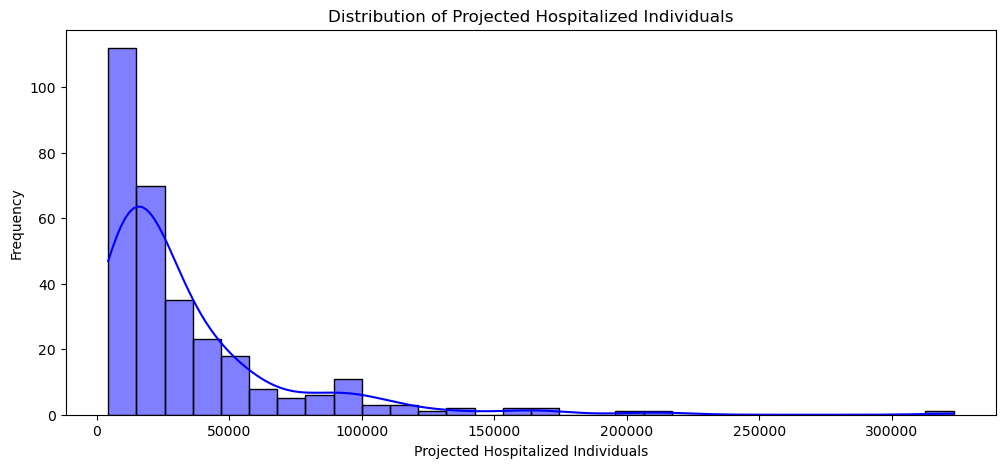

In [51]:
# Visualize data distribution with a histogram
plt.figure(figsize=(12, 5))

if df_new[target_column].dtype != "O":  
    sns.histplot(df_new[target_column], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {target_column}")
    plt.xlabel(target_column)
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"Error: {target_column} is not numeric!")

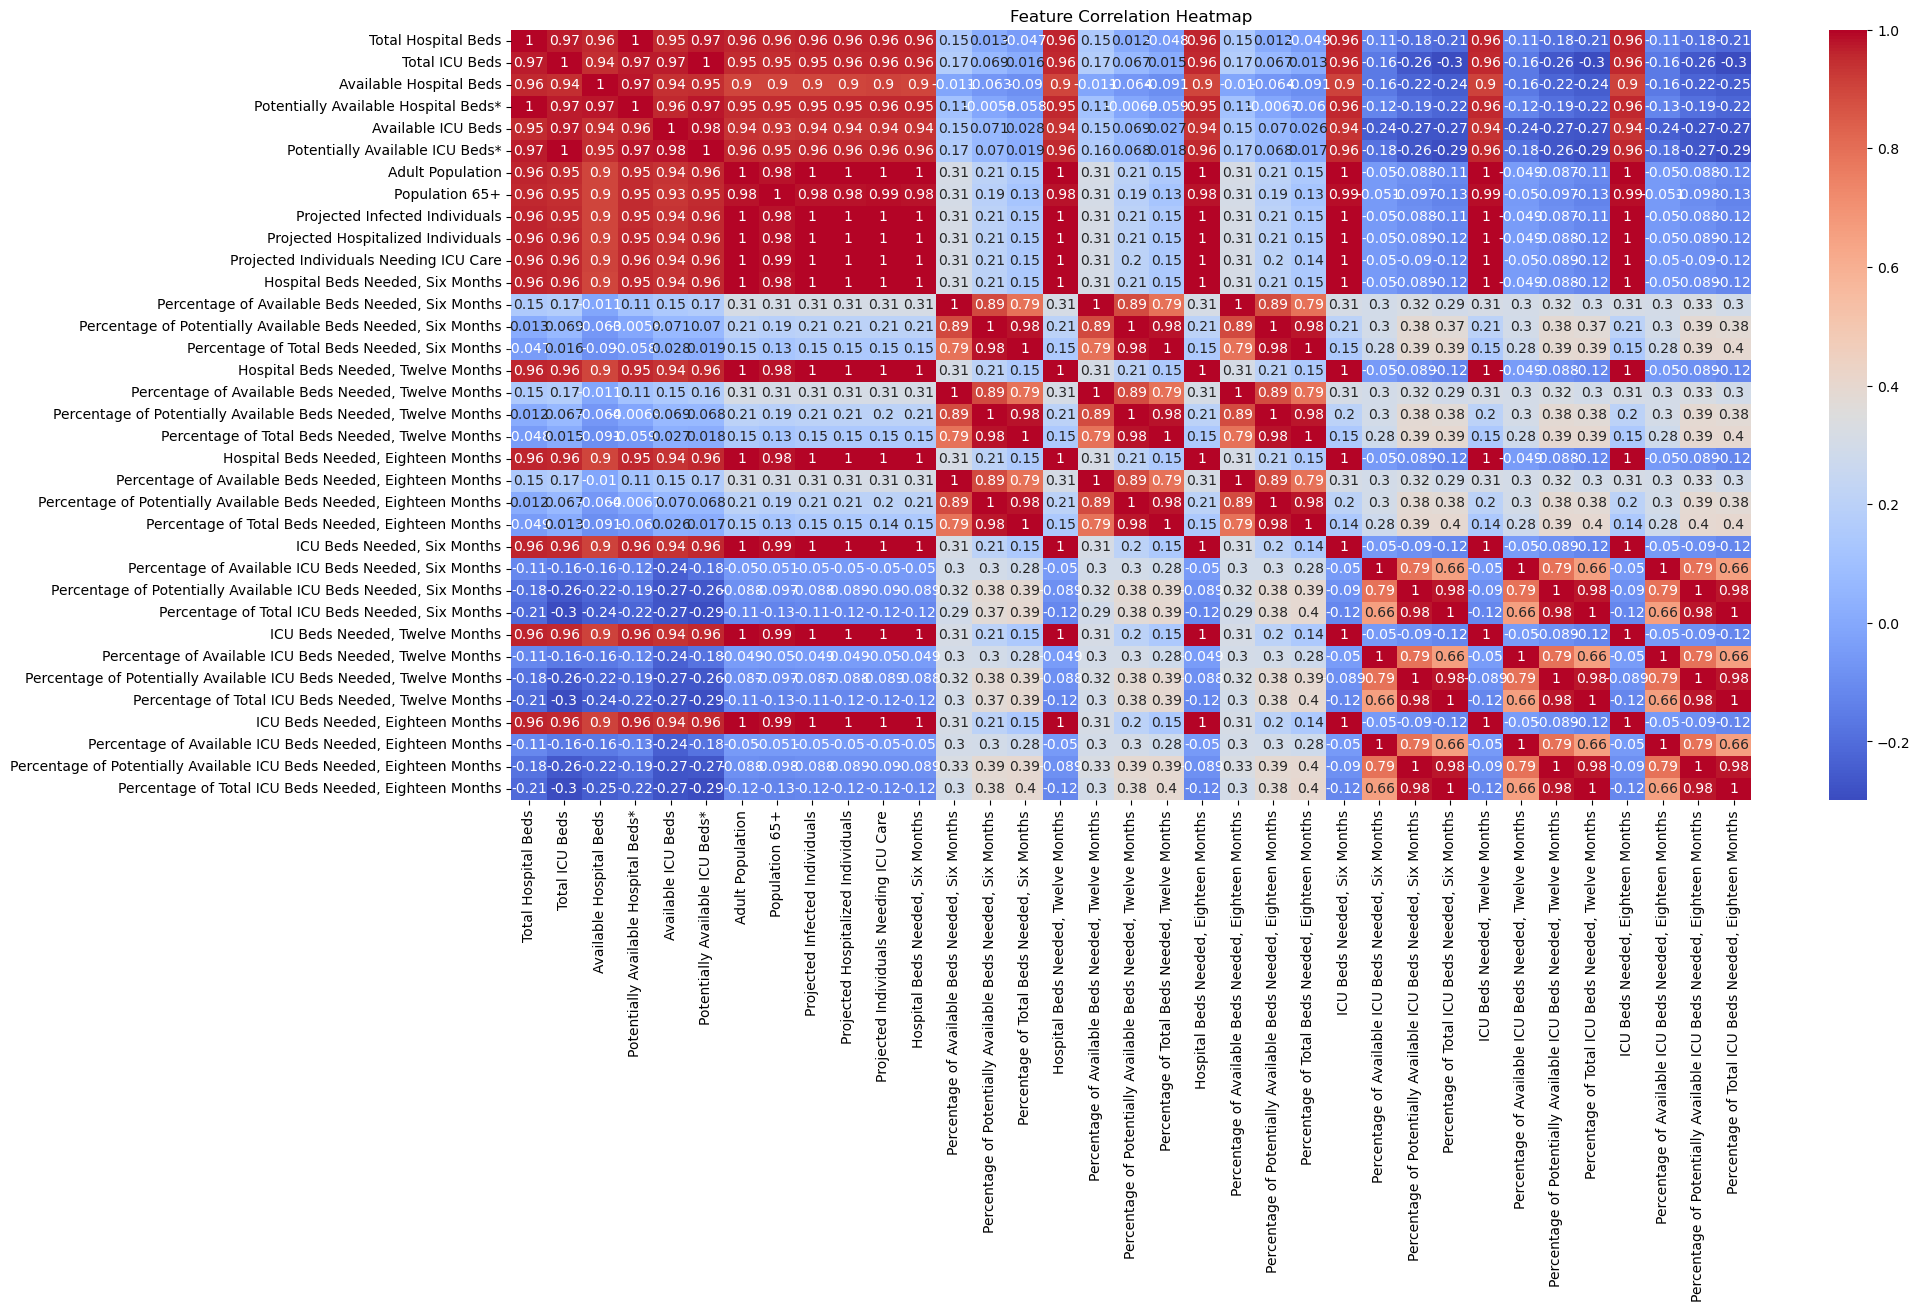

In [52]:
# Feature Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df_new.select_dtypes(include=['number'])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [53]:
# Train-Test Split
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: No data available for train-test split after cleaning!")

In [54]:
# Train and Evaluate Models
from sklearn.model_selection import train_test_split

In [55]:
print(X.dtypes)

HRR                                                                      object
Total Hospital Beds                                                       int64
Total ICU Beds                                                            int64
Potentially Available Hospital Beds*                                      int64
Available ICU Beds                                                      float64
Potentially Available ICU Beds*                                           int64
Adult Population                                                          int64
Population 65+                                                            int64
Projected Infected Individuals                                            int64
Projected Hospitalized Individuals                                        int64
Projected Individuals Needing ICU Care                                    int64
Hospital Beds Needed, Six Months                                          int64
Percentage of Available Beds Needed, Six

In [56]:
print("Categorical columns:",X.select_dtypes(include=['object']).columns)

Categorical columns: Index(['HRR'], dtype='object')


In [57]:
X = X.select_dtypes(include = [np.number])
X

,Total Hospital Beds,Total ICU Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,Projected Individuals Needing ICU Care,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,1358,186,938,94.0,140,547990,111042,109598,22933,4959,...,236,178,165,176,118,89,108,115,77,58
1,2695,293,1680,139.0,216,1310189,214991,262038,53872,11400,...,352,259,380,273,176,130,248,178,115,85
2,704,60,462,27.0,43,157143,30466,31429,6550,1410,...,219,157,47,174,109,78,31,115,72,52
3,4804,425,3191,193.0,309,1477723,318695,295545,62209,13545,...,292,212,452,234,146,106,294,152,95,69
4,2908,380,2005,161.0,270,1336795,279457,267359,56108,12174,...,301,214,406,252,150,107,265,165,98,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2870,499,1857,40.0,269,899862,197294,179972,37943,8278,...,205,111,276,690,103,55,180,450,67,36
300,1525,169,975,43.0,106,652386,122123,130477,27111,5812,...,365,229,194,451,183,115,126,293,119,75
301,369,58,285,33.0,45,220972,40707,44194,9170,1963,...,291,226,65,197,144,112,43,130,96,74
302,868,79,567,8.0,43,343334,73773,68667,14448,3145,...,488,266,105,1313,244,133,68,850,158,86


In [58]:
X = pd.get_dummies(X, drop_first = True)
X

,Total Hospital Beds,Total ICU Beds,Potentially Available Hospital Beds*,Available ICU Beds,Potentially Available ICU Beds*,Adult Population,Population 65+,Projected Infected Individuals,Projected Hospitalized Individuals,Projected Individuals Needing ICU Care,...,"Percentage of Potentially Available ICU Beds Needed, Six Months","Percentage of Total ICU Beds Needed, Six Months","ICU Beds Needed, Twelve Months","Percentage of Available ICU Beds Needed, Twelve Months","Percentage of Potentially Available ICU Beds Needed, Twelve Months","Percentage of Total ICU Beds Needed, Twelve Months","ICU Beds Needed, Eighteen Months","Percentage of Available ICU Beds Needed, Eighteen Months","Percentage of Potentially Available ICU Beds Needed, Eighteen Months","Percentage of Total ICU Beds Needed, Eighteen Months"
0,1358,186,938,94.0,140,547990,111042,109598,22933,4959,...,236,178,165,176,118,89,108,115,77,58
1,2695,293,1680,139.0,216,1310189,214991,262038,53872,11400,...,352,259,380,273,176,130,248,178,115,85
2,704,60,462,27.0,43,157143,30466,31429,6550,1410,...,219,157,47,174,109,78,31,115,72,52
3,4804,425,3191,193.0,309,1477723,318695,295545,62209,13545,...,292,212,452,234,146,106,294,152,95,69
4,2908,380,2005,161.0,270,1336795,279457,267359,56108,12174,...,301,214,406,252,150,107,265,165,98,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2870,499,1857,40.0,269,899862,197294,179972,37943,8278,...,205,111,276,690,103,55,180,450,67,36
300,1525,169,975,43.0,106,652386,122123,130477,27111,5812,...,365,229,194,451,183,115,126,293,119,75
301,369,58,285,33.0,45,220972,40707,44194,9170,1963,...,291,226,65,197,144,112,43,130,96,74
302,868,79,567,8.0,43,343334,73773,68667,14448,3145,...,488,266,105,1313,244,133,68,850,158,86


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [61]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [62]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [63]:
# Model Evaluation
models = ["Linear Regression", "Decision Tree", "Random Forest"]
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf)
]
mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf)
]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf)
]

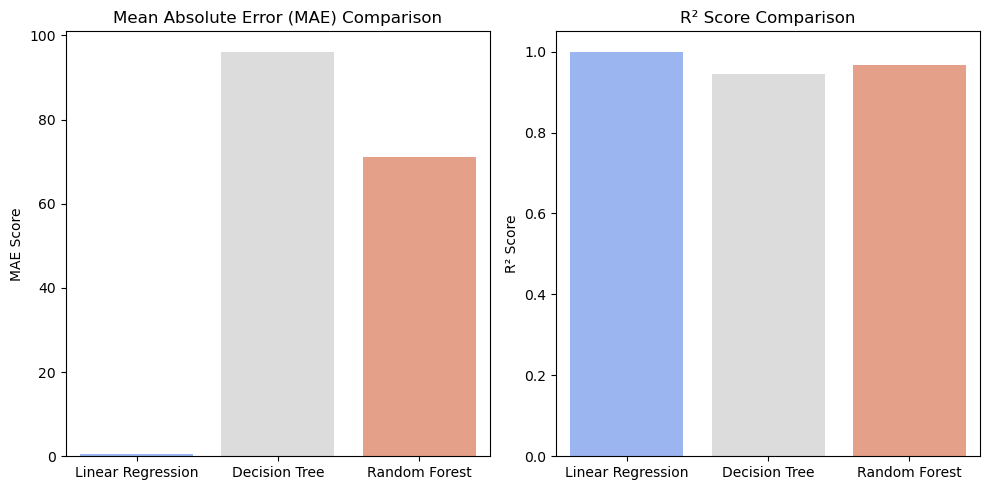

In [64]:
# Visualize Model Performance Bar Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mae_scores, palette="coolwarm")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE Score")

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_scores, palette="coolwarm")
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

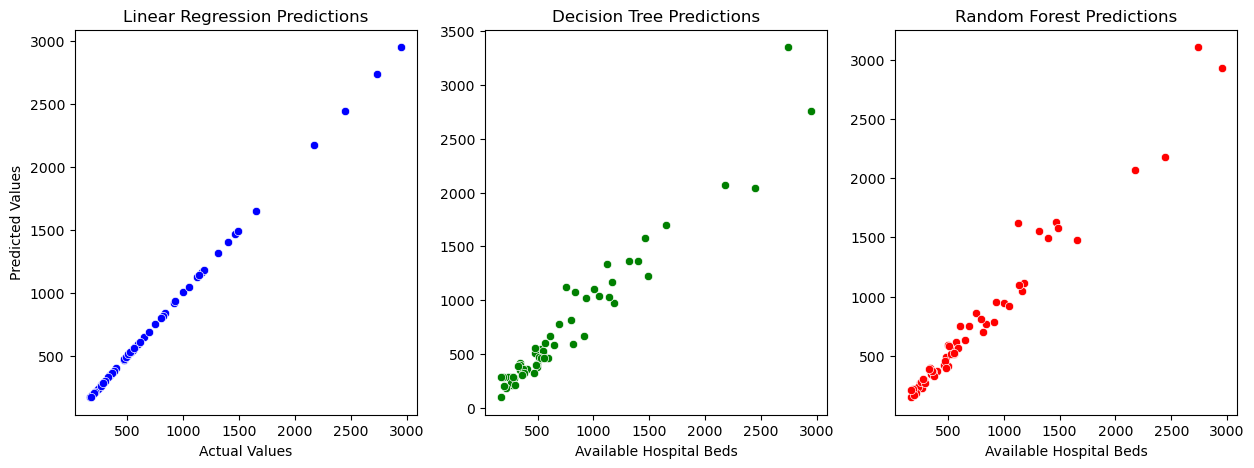

In [65]:
#  Predicted vs Actual Scatter Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color="blue")
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, color="green")
plt.title("Decision Tree Predictions")

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_rf, color="red")
plt.title("Random Forest Predictions")
plt.show()

## Conclusion

In this project, we analyzed hospital bed occupancy trends and developed predictive models to estimate bed availability. After performing data cleaning and exploratory analysis, we implemented Linear Regression, Decision Tree, and Random Forest models.

### Key Findings:
- The *Random Forest model* achieved the best performance, indicating its robustness in handling complex relationships in the data.
- Feature analysis revealed that factors like *patient admission trends, hospital capacity, and seasonal variations* significantly impact bed occupancy.
- The correlation analysis provided insights into which variables most influence hospital bed demand.

### Future Improvements:
- Incorporating *real-time data* for more accurate predictions.
- Exploring *advanced models*, such as Gradient Boosting or Neural Networks.
- Enhancing feature engineering by including external factors like *disease outbreaks or public health policies*.